### Student Details

Student name: Tendai Chaka

Student ID: 20041829

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression 

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [3]:

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta  # Learning rate
        self.epochs = epochs  # Number of iterations over the training set

    def train(self, X, y):
        # Initialize weights
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            # Weight update
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Compute the logistic cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate the net input (linear combination of weights and inputs)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute the sigmoid activation"""
        z = np.clip(z, -250, 250)  # Clipping to prevent overflow
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

        

In [4]:
import pandas as pd
import numpy as np

# Load the dataset from CSV
df = pd.read_csv('iris_data.csv', header=0)

# Select the target (species)
# Only select the first 100 samples for Iris-setosa and Iris-versicolor
y = df.iloc[0:100, 4].values  # Assuming the species is in column 4
y = np.where(y == 'Iris-setosa', 0, 1)  # Map 'Iris-setosa' to 0 and 'Iris-versicolor' to 1

# Select the features: sepal length (column 0) and petal length (column 2)
X = df.iloc[0:100, [0, 2]].values  # Sepal length is column 0, petal length is column 2

# Now X contains sepal length and petal length, and y contains binary labels (0 and 1)



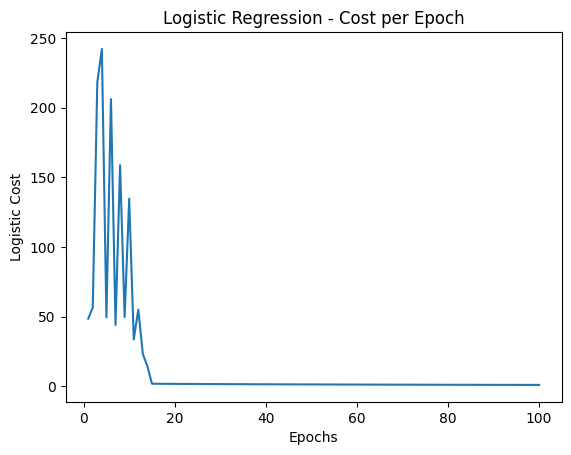

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Train the Logistic Regression model
lr = LogisticRegressionGD(eta=0.01, epochs=100)
lr.train(X_train, y_train)

# Plot the cost per epoch
plt.plot(range(1, len(lr.cost_) + 1), lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.title('Logistic Regression - Cost per Epoch')
plt.show()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

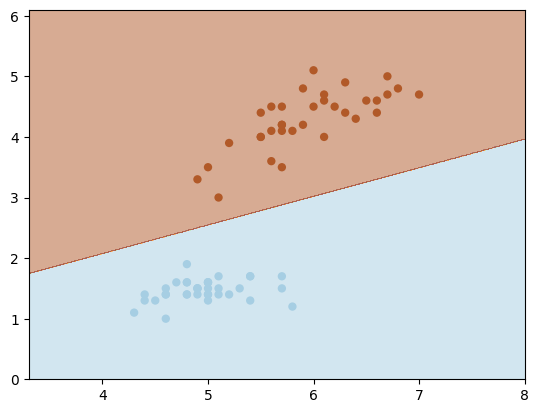

In [6]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here
plot_decision_boundary(X_train, y_train, model=lr)

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2

In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv('iris_data.csv')

# Assign class labels: 0 for setosa, 1 for versicolor, 2 for virginica
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Select petal length (column 2) and petal width (column 3) as features
X = df.iloc[:, [2, 3]].values  # Petal length and petal width

2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.

In [8]:
# Split into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data

In [9]:
# Apply standard scaling to both training and test data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # Fit to training data and transform
X_test_std = sc.transform(X_test)  # Only transform test data (no refitting)

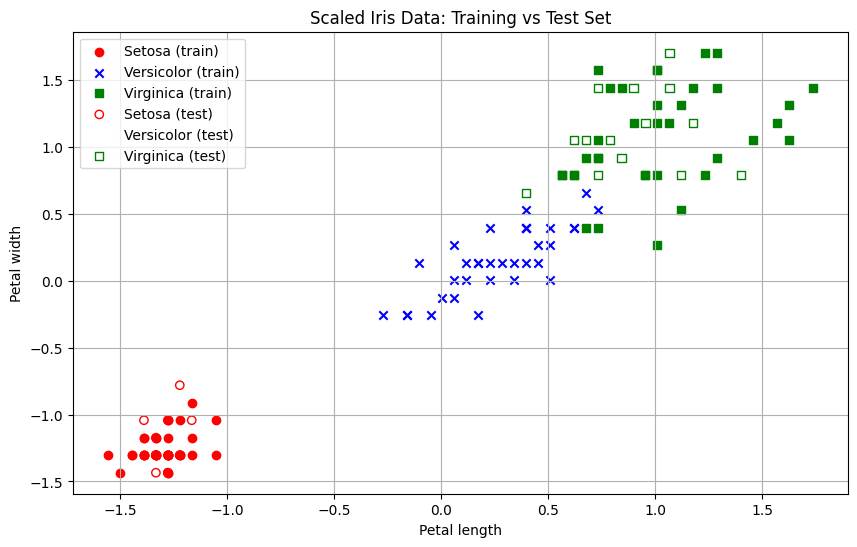

In [10]:
# Plot the scaled training and test data
def plot_scaled_data(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 6))
    
    # Plot training data
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', marker='o', label='Setosa (train)')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='Versicolor (train)')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', marker='s', label='Virginica (train)')
    
    # Plot test data
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', marker='o', facecolors='none', label='Setosa (test)')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', marker='x', facecolors='none', label='Versicolor (test)')
    plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', marker='s', facecolors='none', label='Virginica (test)')
    
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.legend(loc='upper left')
    plt.title('Scaled Iris Data: Training vs Test Set')
    plt.grid(True)
    plt.show()

# Call the function to plot the data
plot_scaled_data(X_train_std, X_test_std, y_train, y_test)

4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters

In [11]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_std)

5. Plot the decision boundary using the supplied plot_decision_boundary function


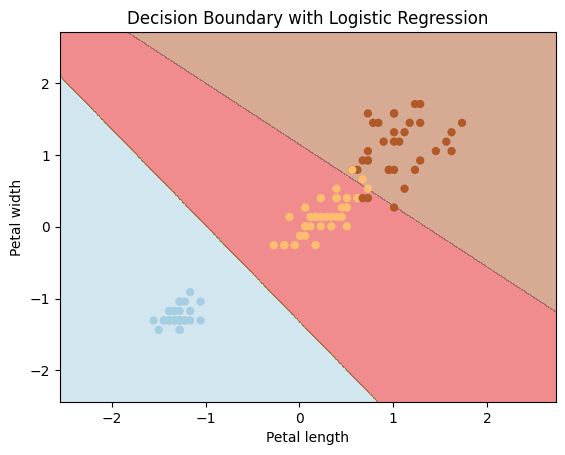

In [12]:
from plot_decision_boundary import plot_decision_boundary

plot_decision_boundary(X_train_std, y_train, model=lr)
plt.title('Decision Boundary with Logistic Regression')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:', accuracy)

Accuracy of Logistic Regression model: 0.9777777777777777


1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)

Accuracy of Logistic Regression model with C=0.01: 77.78%
Accuracy of Logistic Regression model with C=1.0: 97.78%
Accuracy of Logistic Regression model with C=10: 97.78%
Accuracy of Logistic Regression model with C=100: 97.78%


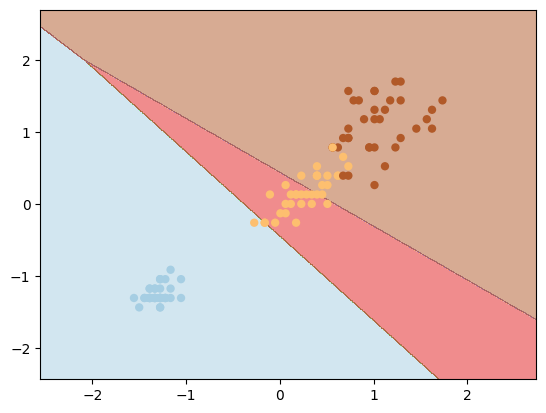

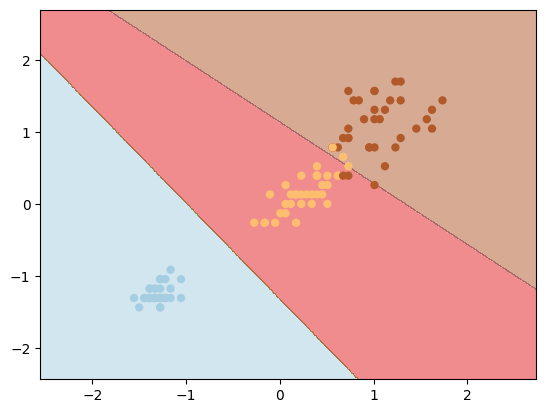

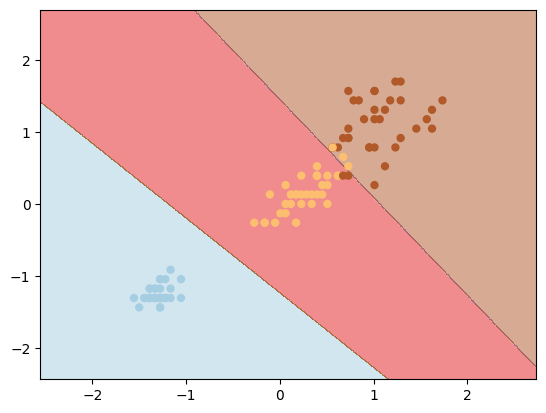

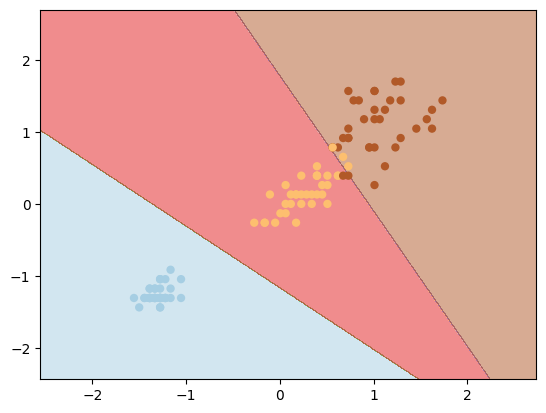

In [14]:
def train_and_plot(C):
    
    lr = LogisticRegression(C=C, random_state=1)
    lr.fit(X_train_std, y_train)

    # Predict on the test set
    y_pred = lr.predict(X_test_std)

    # Output accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of Logistic Regression model with C={C}: {accuracy * 100:.2f}%')

    # Plot decision boundary
    plot_decision_boundary(X_train_std, y_train, model=lr)

C_values = [0.01, 1.0, 10, 100]
for C in C_values:
    train_and_plot(C)

<span style="color:red">Insert your text answers below</span>.

Based on the graphs generated and the influence of the different values of (C) in regularization, I can see that:

When C = 0.01 strong regularization, the model is the least precise, with an accuracy of 77.78%. The boundary is simpler, and the model is more biased to generalize, even at the cost of a few mistakes. It improves further with  C going to 0.1, 1, and 10 at 97.78%. At the latter C = 0.1 , which generates perfect accuracy on the training set of 100%, the decision boundaries are discriminating better between classes without being overly complex at those values. For instance, when C = 100 is weak regularization, the accuracy of 97.78% can be considered high. However, there is a good chance that this model may start to overfit because it starts to capture noise in the data.

When the value of C is small, for instance, C = 0.01 strong regularization, the boundary between classes appears much smoother and simpler. In other words, it can lead to higher bias because such a model does not perfectly fit to the data but has a higher chance of generalization. On the other hand, with larger values of C which equates to weaker regularization-- such as C = 100, the decision boundary becomes more specific. This can make the model overly fit to the training data, thereby increasing its chances of overfitting: this is where it performs well on the training set but may have poor performance on unseen data.

Regularization is a technique of avoiding overfitting by not letting the model become too complex. A low value of C forces the model to become simpler because this may lead to underfitting, where the model does not capture enough of the data's complexity. The large C allows the model to get more complicated and fit the training data more closely, but it may overfit-perform well on the training data but poorly on new data. In this case, a moderate value seems to strike the best balance; C = 0.1 yields both high accuracy and reasonable decision boundaries without overfitting.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2

In [15]:
################################
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv('iris_data.csv')

# Assign class labels: 0 for setosa, 1 for versicolor, 2 for virginica
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Select petal length (column 2) and petal width (column 3) as features
X = df.iloc[:, [2, 3]].values  # Petal length and petal width


2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.

In [16]:
# Split into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data

In [17]:
scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print the scaled data
print("Scaled Training Data:")
print(X_train_scaled)

print("\nScaled Test Data:")
print(X_test_scaled)

Scaled Training Data:
[[-1.33269725 -1.30380366]
 [-1.16537974 -1.30380366]
 [ 0.84243039  1.44465434]
 [ 1.0655204   1.18289644]
 [-1.44424226 -1.30380366]
 [ 1.0097479   1.57553329]
 [ 1.56747294  1.18289644]
 [-1.44424226 -1.30380366]
 [ 1.12129291  0.52850167]
 [ 0.45202286  0.13586482]
 [-0.27301968 -0.25677204]
 [ 0.06161534  0.26674377]
 [-1.38846976 -1.30380366]
 [ 0.50779537  0.00498586]
 [ 0.11738784  0.13586482]
 [ 0.73088538  0.92113853]
 [-1.05383474 -1.30380366]
 [-0.16147468 -0.25677204]
 [ 0.06161534  0.00498586]
 [-1.22115225 -1.30380366]
 [ 0.56356787  0.79025958]
 [ 1.73479045  1.44465434]
 [ 0.39625036  0.39762272]
 [ 0.39625036  0.13586482]
 [ 0.00584283 -0.12589309]
 [ 1.0097479   1.57553329]
 [ 0.50779537  0.26674377]
 [ 1.0097479   0.26674377]
 [ 1.12129291  1.31377539]
 [ 0.73088538  1.57553329]
 [ 0.17316034  0.13586482]
 [-1.27692475 -1.04204575]
 [ 1.62324544  1.31377539]
 [ 0.67511288  0.92113853]
 [ 0.56356787  0.79025958]
 [ 1.0097479   1.18289644]
 [ 0.2

4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear

In [18]:
from sklearn.svm import SVC
# Train the Support Vector Classifier (SVC) with a linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)


SVC(kernel='linear')

5. Plot the decision boundary using the supplied plot_decision_boundary function


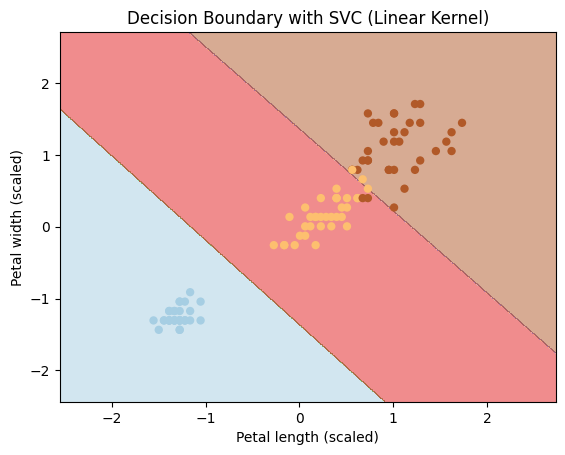

In [19]:
from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_train_scaled, y_train, svc)
plt.title('Decision Boundary with SVC (Linear Kernel)')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.show()

6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

In [20]:
accuracy = svc.score(X_test_scaled, y_test)
print(f"Accuracy of SVC with linear kernel: {accuracy * 100:.2f}%")

Accuracy of SVC with linear kernel: 97.78%


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution 

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

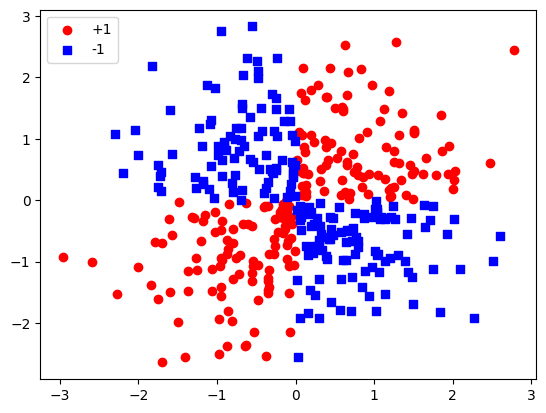

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

In [22]:

svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X_r, y_r)


SVC(gamma=0.1)

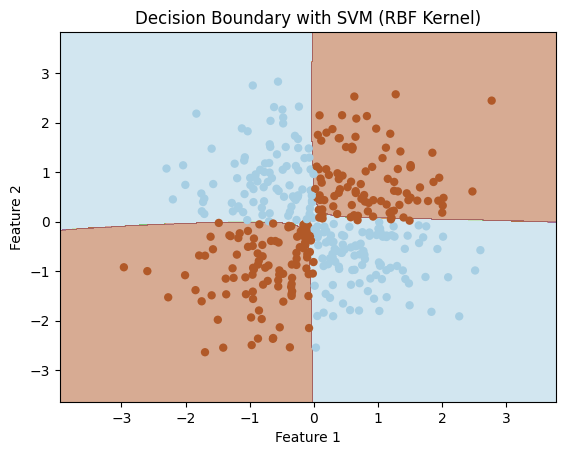

In [23]:
plot_decision_boundary(X_r, y_r, svm_rbf)
plt.title('Decision Boundary with SVM (RBF Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2. Gamma = 100

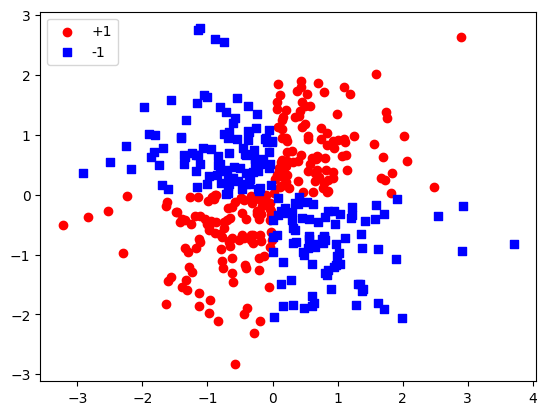

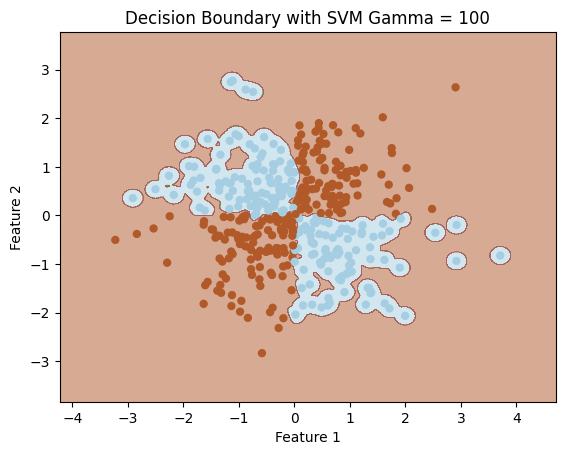

In [24]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_boundary import plot_decision_boundary

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

svm_rbf = SVC(kernel='rbf', gamma=100)
svm_rbf.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, svm_rbf)
plt.title('Decision Boundary with SVM Gamma = 100')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 3. What happens?

For a gamma value of 100, the SVM classifier becomes overly sensitive to individual points and traces out a very complex, jagged decision boundary. This is indicative of overfitting, since the model attempts to classify every single point perfectly and even tries to classify noise in the dataset. This leads to very high accuracy on the training data but forms a complex, over-specified decision boundary which generally performs very poorly on new, unseen data. The tight contours around the points tell that the model is kind of memorizing the data rather than learning the pattern. As such, this model will probably perform very poorly on any other data than the dataset when tested. A lower value of gamma would produce a smoother boundary that generalizes boundaries better, capturing the overall structure of the data.

## Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

In [25]:
################################
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv('iris_data.csv')

# Assign class labels: 0 for setosa, 1 for versicolor, 2 for virginica
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Select petal length (column 2) and petal width (column 3) as features
X = df.iloc[:, [2, 3]].values  # Petal length and petal width


In [26]:
# Split into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [27]:
scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [28]:
svm_rbf_iris = SVC(kernel='rbf', gamma=0.1)
svm_rbf_iris.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

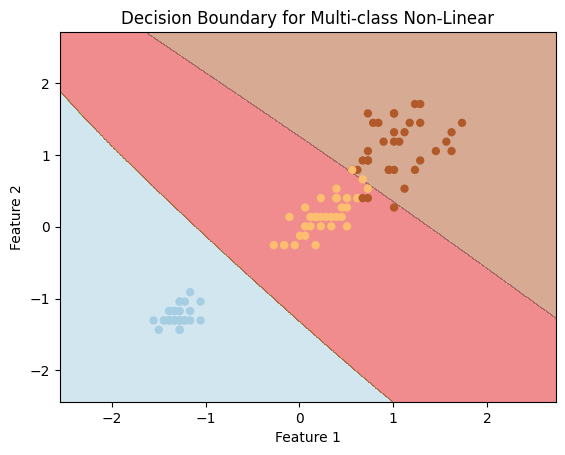

In [30]:
plot_decision_boundary(X_train_scaled, y_train, svm_rbf_iris)
plt.title('Decision Boundary for Multi-class Non-Linear')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()